# 3427720

Using p-mode frequencies determined in Lund et al. (2017).

3427720 9.11 2737 120.1 36 Simple 5.1 − 17.2 6045 ± 77

In [9]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

ast.style.use("asterion-light")

In [10]:
# Lund et al. (2017)
nu_max = (2737, 15)  # in microhertz
delta_nu = (120.1, 0.5)   # in microhertz
teff = (6045, 150)    # in Kelvin

In [11]:
from astroquery.vizier import Vizier

In [12]:
v = Vizier(row_limit=-1)
tables = v.query_constraints("J/ApJ/835/172/table6", KIC="3427720")

In [13]:
df = tables[0].to_pandas()
df.head()

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,e_Width,E_Width,l_lnK,lnK
0,3427720,14,0,1848.95209,3.90222,2.74391,0.05466,0.05457,0.58823,0.50386,0.50136,4.01763,,1.15
1,3427720,14,2,1958.69559,0.32843,0.29630,NaN,NaN,NaN,NaN,NaN,NaN,,1.58
2,3427720,15,0,1969.86022,0.16052,0.16326,1.15074,0.13446,0.13505,0.89937,0.30060,0.38879,>,6.00
3,3427720,15,1,2025.18178,0.14036,0.15393,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
4,3427720,15,2,2077.46080,0.52205,0.76171,NaN,NaN,NaN,NaN,NaN,NaN,,-0.16


In [14]:
mask = df["l"] == 0  # radial orders only
n = df.loc[mask, "n"].to_numpy()
nu, nu_low, nu_high = df.loc[mask, ["Freq", "e_Freq", "E_Freq"]].to_numpy().T

In [15]:
nu_err = np.stack([nu_low, nu_high]).max(axis=0)

In [16]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

In [17]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

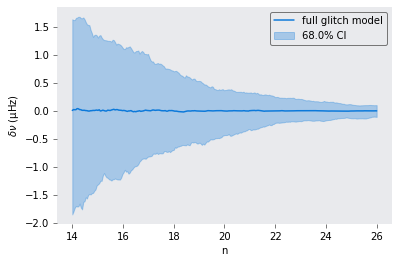

In [18]:
ast.plot_glitch(prior_data, group='prior');

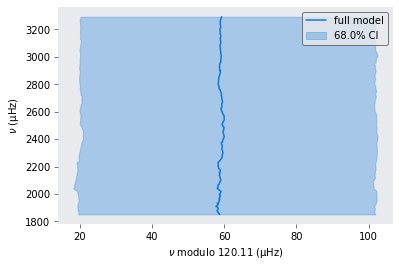

In [19]:
ast.plot_echelle(prior_data, group='prior');

In [20]:
infer.sample()
infer.posterior_predictive()
data = infer.get_data()

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...


/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:293: FutureWarning: jax.tree_map is deprecated, and will be removed in a future release. Use jax.tree_util.tree_map instead.
  x_dead_new = tree_map(lambda x: x[i_min], state.live_points_X)
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:550: FutureWarning: jax.tree_multimap is deprecated, and will be removed in a future release. Use jax.tree_util.tree_multimap instead.
  live_points_U = tree_multimap(
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jax/_src/tree_util.py:205: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:553: FutureWarning

Completed in 18.3 seconds.


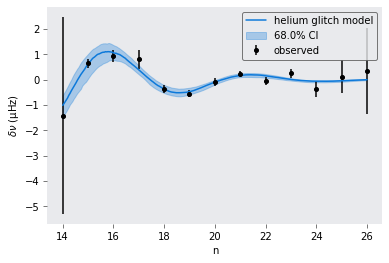

In [21]:
ast.plot_glitch(data, kind='He');

(-0.1, 0.1)

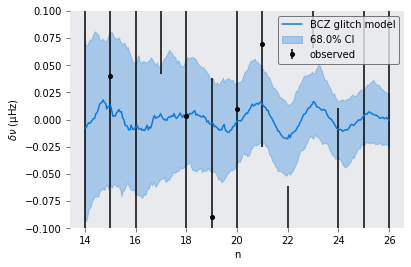

In [22]:
ax = ast.plot_glitch(data, kind='CZ')
ax.set_ylim(-0.1, 0.1)

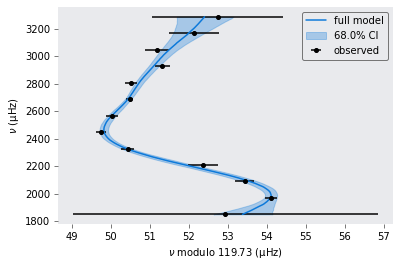

In [23]:
ast.plot_echelle(data);

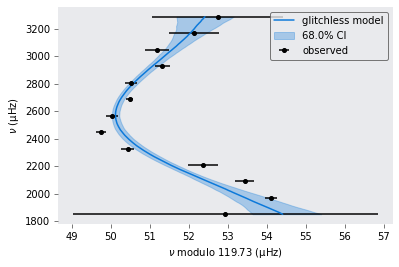

In [24]:
ast.plot_echelle(data, kind='glitchless');

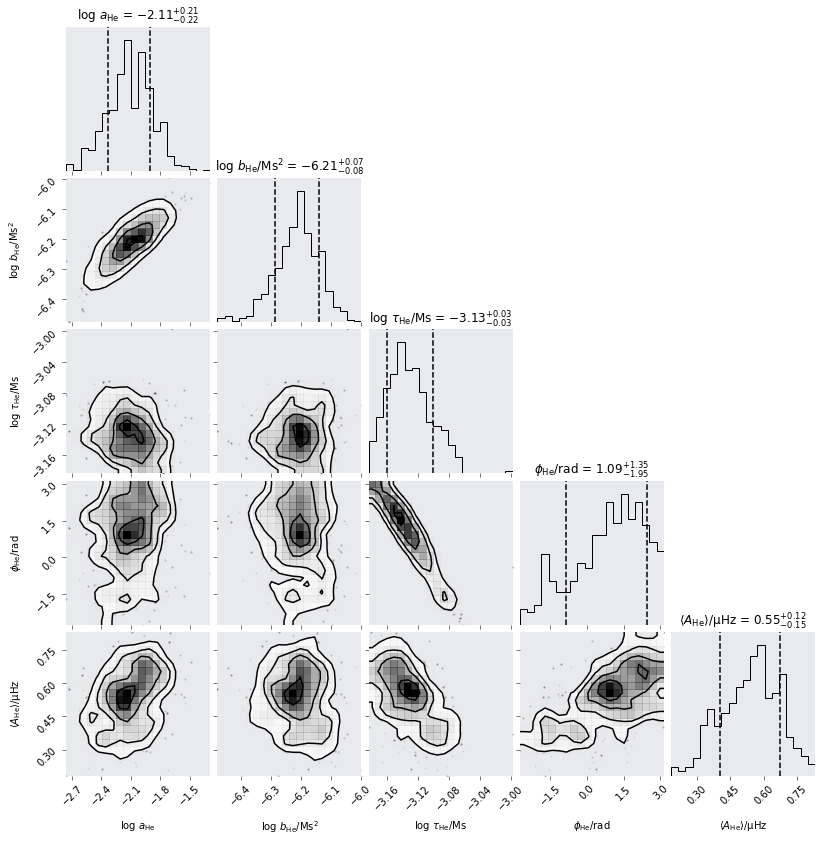

In [25]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

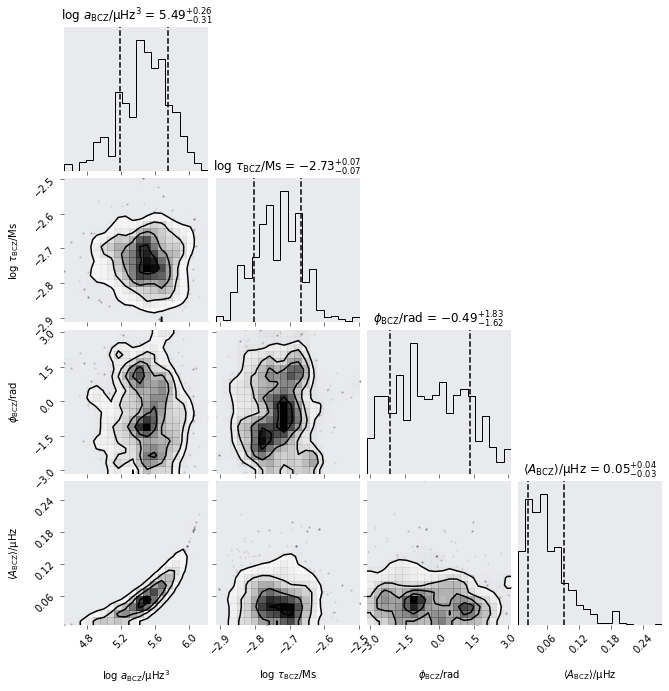

In [26]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz', 'cz_amplitude']);